In [1]:
# import basic laibaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# classifier models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# ensemble models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# model selection methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
# import classification metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [5]:
# loded dataset
ds=pd.read_csv('avocado.csv')
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
ds['Date'].dtype   #check date type

dtype('O')

Date type is obj so first of all it convert into date time foramt.By this we easily pivot it day,month and year columns

In [7]:
ds=pd.read_csv('avocado.csv',parse_dates=['Date'])   #parse_dates=it convert obj type to date time type
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
type(ds['Date'][0])   #check after convert type 

pandas._libs.tslibs.timestamps.Timestamp

# Split date variable in day,month,year

In [9]:
# datetime laibary
import datetime
dt=datetime.datetime.now()

In [10]:
ds['Day']=ds['Date'].dt.day.astype(str)   #convert into day columnns
ds['Month']=ds['Date'].dt.month.astype(str) #convert into month columnns
ds['Year']=ds['Date'].dt.year.astype(str)  #convert into year columnns
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2,2018
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1,2018
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1,2018
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1,2018


In [11]:
#frame it into daatframe
df=pd.DataFrame(data=ds)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2,2018
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1,2018
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1,2018
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1,2018


Total Volume->4046 + 4225 + 4770 + Total Bags + Small Bags + Large Bags + XLarge Bags

Total Bags=Small Bags + Large Bags + XLarge Bags

Date-->we separate date into day,month,year formate so we remove Date and year columns

Unnames-->no significant

# Clean unuseful data variable

In [12]:
df.drop(['Unnamed: 0','Date','year','Total Bags','Total Volume'],axis=1,inplace=True)  #drop date bcoz ew split it

In [13]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,WestTexNewMexico,4,2,2018
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,WestTexNewMexico,28,1,2018
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,WestTexNewMexico,21,1,2018
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,WestTexNewMexico,14,1,2018


In [14]:
df.shape  # check shape of dataset

(18249, 12)

In dataset 18249 rows and 12 columns

In [15]:
df.info()  # get information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   4046          18249 non-null  float64
 2   4225          18249 non-null  float64
 3   4770          18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  object 
 8   region        18249 non-null  object 
 9   Day           18249 non-null  object 
 10  Month         18249 non-null  object 
 11  Year          18249 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


In dataset 18249 rows and 12 columns. In 12 columns, 5 columns are object type and 7 columns are floating type.Null values not present in dats set

In [16]:
df.isnull().sum().sum()   #check total null values present in datset

0

Zero null values present in dataset

In [17]:
df.isnull().sum()  #check null values in all columns

AveragePrice    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Day             0
Month           0
Year            0
dtype: int64

Null values are not present in columns

<AxesSubplot:>

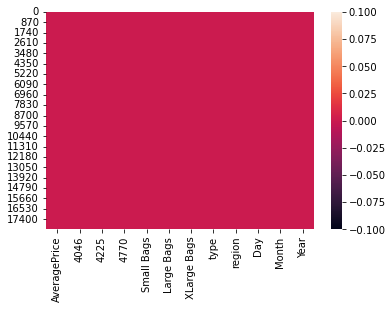

In [18]:
sns.heatmap(df.isnull())   #check null values by visual

No null values present in dataset

In [19]:
type(df)   #check dataset type

pandas.core.frame.DataFrame

# Unique values in categorical data

In [20]:
df['type'].unique()  #check unique values in type variable

array(['conventional', 'organic'], dtype=object)

Only 2 type values conventional and organic 

<AxesSubplot:xlabel='type', ylabel='count'>

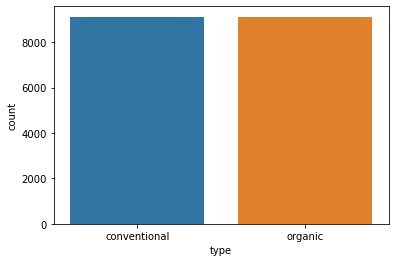

In [21]:
sns.countplot(df.type)

In [22]:
df['region'].unique()  #check unique values in region variable

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

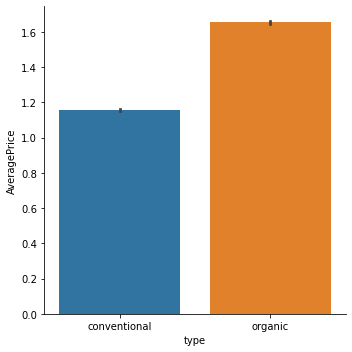

In [23]:
sns.catplot(x='type',y='AveragePrice',kind='bar',data=df)

The price of organic avogado is more compare to conventional type avogado.

# Apply encoder method

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
list1=['type','region','Day','Month','Year']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [27]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0,19,3,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0,12,3,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0,4,3,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0,27,3,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0,21,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53,25,4,3
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53,20,0,3
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53,13,0,3
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53,5,0,3


In [28]:
df.info()  #check information after apply encodeding method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   4046          18249 non-null  float64
 2   4225          18249 non-null  float64
 3   4770          18249 non-null  float64
 4   Small Bags    18249 non-null  float64
 5   Large Bags    18249 non-null  float64
 6   XLarge Bags   18249 non-null  float64
 7   type          18249 non-null  int32  
 8   region        18249 non-null  int32  
 9   Day           18249 non-null  int32  
 10  Month         18249 non-null  int32  
 11  Year          18249 non-null  int32  
dtypes: float64(7), int32(5)
memory usage: 1.3 MB


no object and null values peresent

# Statistic of Dataset

In [29]:
df.describe()  #check statistic of avocada

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644,14.638556,5.254261,1.147899
std,0.402677,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788,8.985265,3.445529,0.939938
min,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000,7.000000,2.000000,0.000000
50%,1.370000,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000,15.000000,5.000000,1.000000
75%,1.660000,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000,22.000000,8.000000,2.000000
max,3.250000,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000,30.000000,11.000000,3.000000


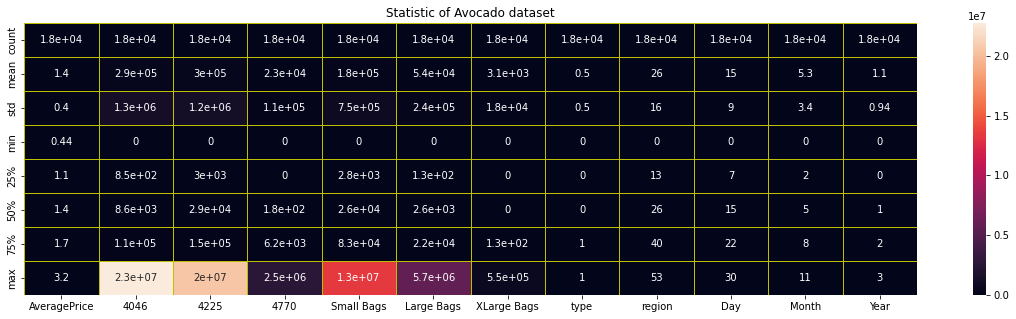

In [30]:
plt.figure(figsize=(20,5))
sns.heatmap(df.describe(),annot=True,linewidth=1,linecolor='y')
plt.title('Statistic of Avocado dataset')
plt.savefig('Statistic of Avocado dataset')
plt.show()

# Check Outliers --->Boxplot

In [31]:
col=df.columns
ncol=6
nrow=15

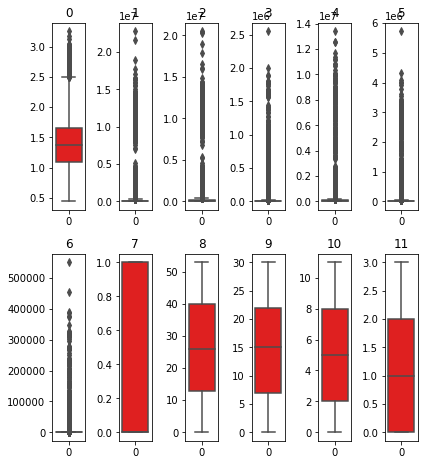

In [32]:
plt.figure(figsize=(ncol,8*ncol))
for i in range(len(col)):
    plt.subplot(nrow,ncol,i+1)
    plt.title(i)
    sns.boxplot(data=df[col[i]],color='r',orient='v')
    plt.savefig('Outliers of dataset Avocado')
    plt.tight_layout()

Outliers are present in Average_price,4046,4225,4770,Small_bags,Large_bags,Xlarge_bags.

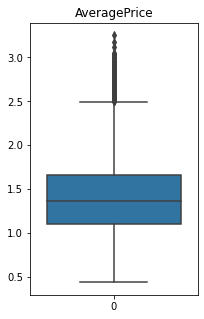

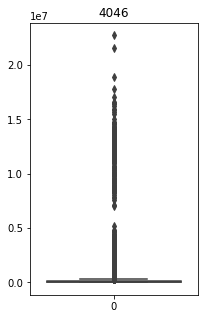

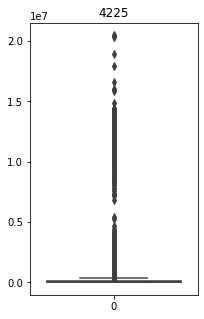

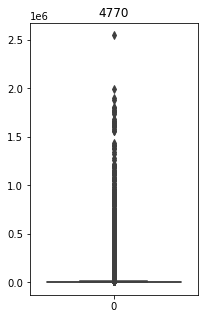

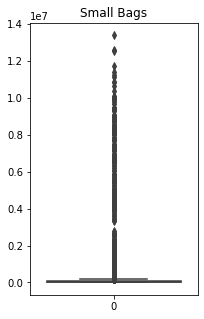

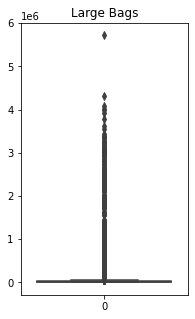

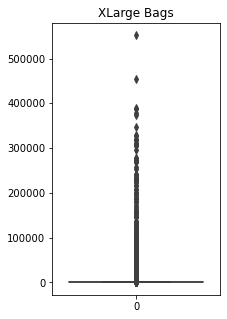

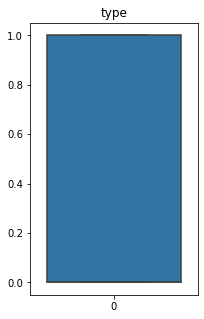

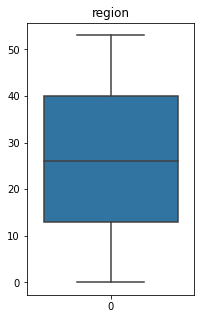

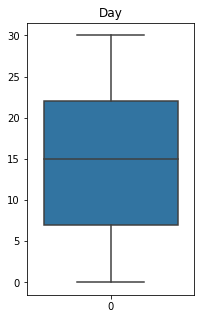

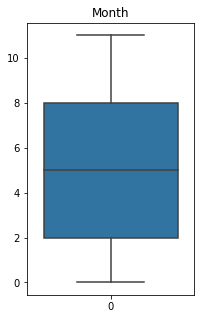

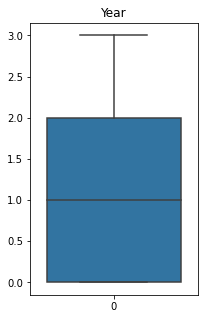

In [33]:
for i in df.columns:
    plt.figure(figsize=(3,5))
    plt.title(i)
    sns.boxplot(data=df[i])
    plt.show()

Outliers are present in Average_price,Total_volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,Xlarge_bags.

# Check Correlation Between Dataset Variable

In [34]:
df.corr()   #check corelation between dataset variable

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
AveragePrice,1.000000,-0.208317,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.005108,0.089738,0.093197
4046,-0.208317,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,-0.225819,0.192073,0.004189,0.009885,0.003353
4225,-0.172928,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,0.145726,0.004262,0.000741,-0.009559
4770,-0.179446,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,0.095252,0.003424,0.007966,-0.036531
Small Bags,-0.174730,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.164702,0.003565,0.002640,0.063915
Large Bags,-0.172940,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.198768,0.001485,-0.015027,0.087891
XLarge Bags,-0.117592,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.082281,0.007030,0.044398,0.081033
type,0.615845,-0.225819,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000055,-0.000051,-0.000032
region,-0.011716,0.192073,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,1.000000,-0.000094,-0.000088,-0.000055
Day,0.005108,0.004189,0.004262,0.003424,0.003565,0.001485,0.007030,-0.000055,-0.000094,1.000000,0.019282,0.002930


<AxesSubplot:>

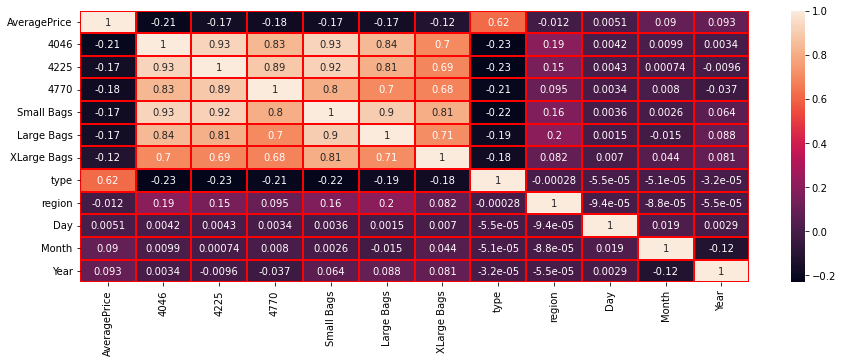

In [35]:
plt.figure(figsize=(15,5))  #better understand correlation plot diagrame
sns.heatmap(df.corr(),annot=True,linewidth=2,linecolor='r')

Observation-->
1. Average Price correlated with target Average Price is -1.2%.It is good bond.
2. 4046 correlated with target Average Price is 19%.It is good bond.
3. 4225 correlated with target Average Price is 15%.It is good bond.
4. 4770 correlated with target Average Price is  9.5%.It is good bond.
5.Small Bags correlated with target Average Price is 16%.It is good bond.
6.Large Bags correlated with target Average Price is 20%.It is good bond.
7.XLarge Bags correlated with target Average Price is 8.2%.It is good bond.
8.Type correlated with target Average Price is -0.028%.It is very poor bond.
9.Day correlated with target Average Price is 0.0013.It is poor bond.
10.Month correlated with target Average Price is 0.00%.It is very poor bond.
11.Year correlated with target Average Price is 0.000%.It is very poor bond.

Day,Month,year is very less correlated with target region , so we remove it

In [39]:
df=df.drop(['Day','Month','Year'],axis=1)

# Check Outliers

In [40]:
from scipy.stats import zscore    #import zscore libary for check outliers

In [41]:
(np.abs(zscore(df))<3).all().all()   #check outliers are prsent or not in dataset

False

outliers are present in dataset

In [42]:
(np.abs(zscore(df))<3).all()  #check outliers in dataset particular columns

AveragePrice    False
4046            False
4225            False
4770            False
Small Bags      False
Large Bags      False
XLarge Bags     False
type             True
region           True
dtype: bool

Outliers are present in AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags

In [43]:
df1=df.drop(['AveragePrice','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1)

sepearte categorial type data and whoes outliers are not present

In [45]:
type(df1)  #type check df1

pandas.core.frame.DataFrame

In [46]:
df2=df.drop(['type','region'],axis=1)
df2

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0
...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0


In [47]:
z=(np.abs(zscore(df2))<3).all()  #outliers present in some columns
z

AveragePrice    False
4046            False
4225            False
4770            False
Small Bags      False
Large Bags      False
XLarge Bags     False
dtype: bool

# Apply IQR Method

In [48]:
q1=df2.quantile(0.25)   #apply iqr method on 0.25 %data
q1

AveragePrice       1.10
4046             854.07
4225            3008.78
4770               0.00
Small Bags      2849.42
Large Bags       127.47
XLarge Bags        0.00
Name: 0.25, dtype: float64

In [49]:
q2=df2.quantile(0.75)   #apply iqr method on 0.75% data
q2

AveragePrice         1.66
4046            111020.20
4225            150206.86
4770              6243.42
Small Bags       83337.67
Large Bags       22029.25
XLarge Bags        132.50
Name: 0.75, dtype: float64

In [50]:
iqr=q2-q1  #get 50%data values

In [51]:
upper=q2+(iqr*1.5)
lower=q1-(iqr*1.5)

In [52]:
df2=df2[(df2>lower) & (df2<upper)]
df2

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0
...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0


In [53]:
df2.isnull().sum()  #check null values after outliers removal by iqr method

AveragePrice     209
4046            2518
4225            2519
4770            2918
Small Bags      2407
Large Bags      2707
XLarge Bags     4014
dtype: int64

In [54]:
from sklearn.impute import SimpleImputer   #import null values remove liabary

In [55]:
imp=SimpleImputer(strategy='median')  #data int form so use mean/median

In [56]:
for i in df2.columns:
    df2[i]=imp.fit_transform(df2[i].values.reshape(-1,1))
    

In [57]:
df2.isnull().sum()  #check after remove null values

AveragePrice    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
dtype: int64

Now no null values are not present in dataset after apply iqr method

# Check Skewness in Both df1 and df2 frame

In [58]:
df1.skew()  #check skewness in df1 frame

type      0.000329
region    0.000030
dtype: float64

It is all in object form so we do not apply power method on it.

In [59]:
df2.skew()  #check skewness in df2 frame

AveragePrice    0.344117
4046            2.115606
4225            2.169585
4770            2.689417
Small Bags      1.718893
Large Bags      2.347949
XLarge Bags     5.125288
dtype: float64

If we take threshold values +/-0.5 then skewness are present.
1.4046            2.115606
2.4225            2.169585
3.4770            2.689417
4.Small Bags      1.718893
5.Large Bags      2.347949
6.XLarge Bags     5.125288

# Apply power method on df2(int) dataset for removing skewness

In [60]:
from sklearn.preprocessing import power_transform

In [61]:
df3=power_transform(df2)

In [62]:
type(df3)

numpy.ndarray

In [63]:
df4=pd.DataFrame(data=df3,columns=df2.columns)
df4

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,-0.085525,-0.591970,0.688560,0.022006,-0.298929,-0.785469,-0.368851
1,-0.031285,-0.735335,0.572058,0.080950,-0.251724,-0.773948,-0.368851
2,-1.278989,-0.681259,1.124971,0.327406,-0.333972,-0.759239,-0.368851
3,-0.805130,-0.561953,0.858121,0.148089,-0.506960,-0.689745,-0.368851
4,-0.223157,-0.624598,0.561627,0.161325,-0.481468,-0.580174,-0.368851
...,...,...,...,...,...,...,...
18244,0.683745,-0.353093,-0.951431,-1.263171,-0.070253,-0.341454,-0.368851
18245,0.874288,-0.544289,-0.654284,-1.263171,-0.278783,-0.431614,-0.368851
18246,1.239300,-0.544225,-0.782186,0.841449,-0.254920,-0.977680,-0.368851
18247,1.371035,-0.457723,-0.708686,0.841074,-0.171004,-0.939012,-0.368851


In [64]:
df4.skew()

AveragePrice   -0.000410
4046           -0.049546
4225           -0.074888
4770            0.033847
Small Bags     -0.129272
Large Bags     -0.153447
XLarge Bags     2.344622
dtype: float64

Skewness not remove of XLarge Bags then we do 2nd times

In [65]:
df5=power_transform(df4)

In [66]:
df2=pd.DataFrame(data=df5,columns=df2.columns)

In [67]:
df2.skew()

AveragePrice   -0.003322
4046           -0.048685
4225           -0.008524
4770            0.036427
Small Bags     -0.009815
Large Bags      0.014380
XLarge Bags     2.341232
dtype: float64

Now this turn not remove skewness ,so we drop it

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

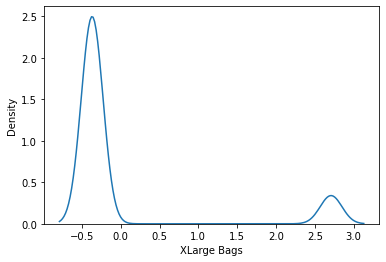

In [68]:
sns.kdeplot(df2['XLarge Bags'])

In [69]:
 df2['XLarge Bags']=np.log( df2['XLarge Bags'])  #apply log transform method 

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

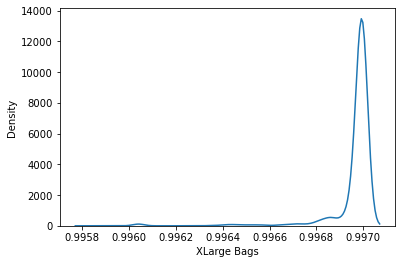

In [70]:
sns.kdeplot( df2['XLarge Bags'])

In [71]:
 df2['XLarge Bags'].skew()

-5.677446448072223

after apply log transform method same condition so we remove it

In [72]:
df2=df2.drop( ['XLarge Bags'],axis=1)

In [73]:
ds=pd.concat([df1,df2],axis=1)
ds

,type,region,AveragePrice,4046,4225,4770,Small Bags,Large Bags
0,0,0,-0.084805,-0.592105,0.681234,0.020754,-0.331969,-0.803508
1,0,0,-0.030559,-0.735425,0.561912,0.079707,-0.285844,-0.792850
2,0,0,-1.279481,-0.681367,1.131551,0.326313,-0.366099,-0.779230
3,0,0,-0.804935,-0.562097,0.855604,0.146870,-0.533293,-0.714662
4,0,0,-0.222477,-0.624723,0.551248,0.160111,-0.508784,-0.612095
...,...,...,...,...,...,...,...,...
18244,1,53,0.684078,-0.353285,-0.952172,-1.262398,-0.106804,-0.385055
18245,1,53,0.874398,-0.544437,-0.663188,-1.262398,-0.312306,-0.471419
18246,1,53,1.238877,-0.544374,-0.787859,0.841146,-0.288973,-0.979943
18247,1,53,1.370388,-0.457893,-0.716271,0.840770,-0.206557,-0.944649


# TARGET-->Region

In [74]:
x=ds.drop('region',axis=1)  #drop target variable for do independent data

In [75]:
y=ds.region  #separte target vriable into 

# Apply standalar scaler method

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
st=StandardScaler()

In [78]:
x=st.fit_transform(x)
x

array([[-0.99983562, -0.08480522, -0.59210488, ...,  0.02075428,
        -0.33196938, -0.80350817],
       [-0.99983562, -0.03055886, -0.73542463, ...,  0.07970676,
        -0.28584448, -0.79285015],
       [-0.99983562, -1.27948097, -0.68136688, ...,  0.32631253,
        -0.36609911, -0.77923005],
       ...,
       [ 1.00016441,  1.23887658, -0.54437351, ...,  0.84114589,
        -0.28897338, -0.97994299],
       [ 1.00016441,  1.37038807, -0.45789283, ...,  0.84077003,
        -0.20655697, -0.94464873],
       [ 1.00016441,  0.65988549, -0.2256358 , ...,  0.49079086,
        -0.15527189, -1.07695105]])

# Apply train test split method for finding best method

In [79]:
LO=LogisticRegression()
GA=GaussianNB()
MA=MultinomialNB()
DTC=DecisionTreeClassifier()
SV=SVC()
KN=KNeighborsClassifier()
AD=AdaBoostClassifier()
GR=GradientBoostingClassifier()
RF=RandomForestClassifier()

# Model--->Logistic Regressor

In [80]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LO.fit(x_train,y_train)
    pred=LO.predict(x_test)
    test=accuracy_score(y_test,pred)
    print(f"At random state {i} the accuracy_score is {test}")
    
    if test>max_acc:
        max_acc=test
        max_rand=i
        print(f'At max_rand {i} Max_Accuracy {max_acc}')
        print('\n')

At random state 0 the accuracy_score is 0.22356164383561644
At max_rand 0 Max_Accuracy 0.22356164383561644


At random state 1 the accuracy_score is 0.2326027397260274
At max_rand 1 Max_Accuracy 0.2326027397260274


At random state 2 the accuracy_score is 0.2293150684931507
At random state 3 the accuracy_score is 0.21698630136986302
At random state 4 the accuracy_score is 0.2147945205479452
At random state 5 the accuracy_score is 0.21616438356164383
At random state 6 the accuracy_score is 0.22904109589041097
At random state 7 the accuracy_score is 0.21095890410958903
At random state 8 the accuracy_score is 0.2156164383561644
At random state 9 the accuracy_score is 0.22
At random state 10 the accuracy_score is 0.22684931506849315
At random state 11 the accuracy_score is 0.21945205479452054
At random state 12 the accuracy_score is 0.2252054794520548
At random state 13 the accuracy_score is 0.22986301369863013
At random state 14 the accuracy_score is 0.22383561643835617
At random state 15

At random state 25 model give accuarcy score is 23.61%

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)
LO.fit(x_train,y_train)
pred_test=LO.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(LO.score(x_train,y_train))*100}")

Confusion Matrix : [[48  0  0 ...  0  0  0]
 [ 0  2  5 ...  0  0  3]
 [ 0  0 16 ...  0  0  3]
 ...
 [ 7  0  0 ...  9  0  0]
 [ 1  0  0 ...  2  2  2]
 [ 0  0  1 ...  1  0 17]]
Classification Report :               precision    recall  f1-score   support

           0       0.38      0.63      0.47        76
           1       0.15      0.03      0.05        69
           2       0.18      0.21      0.19        77
           3       0.20      0.24      0.22        72
           4       0.48      0.56      0.52        71
           5       0.34      0.32      0.33        59
           6       0.08      0.04      0.06        69
           7       0.22      0.29      0.25        62
           8       0.09      0.13      0.11        77
           9       0.24      0.50      0.32        62
          10       0.00      0.00      0.00        60
          11       0.00      0.00      0.00        57
          12       0.08      0.13      0.10        60
          13       0.13      0.09      0.11 

Accuracy score is 23.61%.
Try another method for better accuracy score and less error

# Model--->GaussianNB

In [82]:
max_acc=0
max_rand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GA.fit(x_train,y_train)
    pred=GA.predict(x_test)
    test=accuracy_score(y_test,pred)
    print(f"At random state {i} the accuracy_score is {test}")
    
    if test>max_acc:
        max_acc=test
        max_rand=i
        print(f'At max_rand {i} Max_Accuracy {max_acc}')
        print('\n')

At random state 0 the accuracy_score is 0.1441095890410959
At max_rand 0 Max_Accuracy 0.1441095890410959


At random state 1 the accuracy_score is 0.15726027397260273
At max_rand 1 Max_Accuracy 0.15726027397260273


At random state 2 the accuracy_score is 0.14904109589041095
At random state 3 the accuracy_score is 0.13972602739726028
At random state 4 the accuracy_score is 0.15232876712328766
At random state 5 the accuracy_score is 0.14602739726027397
At random state 6 the accuracy_score is 0.1526027397260274
At random state 7 the accuracy_score is 0.1558904109589041
At random state 8 the accuracy_score is 0.14794520547945206
At random state 9 the accuracy_score is 0.14575342465753424
At random state 10 the accuracy_score is 0.14986301369863014
At random state 11 the accuracy_score is 0.14054794520547945
At random state 12 the accuracy_score is 0.1463013698630137
At random state 13 the accuracy_score is 0.14493150684931508
At random state 14 the accuracy_score is 0.14767123287671233
At

At random state 1 model give accuracy score is 15.72%

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
GA.fit(x_train,y_train)
pred_test=GA.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(GA.score(x_train,y_train))*100}")

Confusion Matrix : [[18  0  0 ...  0  9  0]
 [ 4  0  0 ...  5  0  4]
 [ 3  0 10 ...  0  8  0]
 ...
 [ 0  0  0 ... 20  5  0]
 [ 0  0  0 ...  1 34  0]
 [17  0  0 ...  1  0 13]]
Classification Report :               precision    recall  f1-score   support

           0       0.04      0.30      0.06        60
           1       0.00      0.00      0.00        75
           2       0.45      0.13      0.20        76
           3       0.12      0.18      0.15        67
           4       1.00      0.01      0.03        71
           5       0.00      0.00      0.00        72
           6       0.46      0.23      0.31        69
           7       0.08      0.01      0.02        68
           8       0.21      0.07      0.11        68
           9       0.13      0.06      0.08        66
          10       0.00      0.00      0.00        66
          11       0.25      0.44      0.32        59
          12       0.05      0.16      0.08        64
          13       0.00      0.00      0.00 

Accuracy score is 15.72%.
It is high error and low accuracy score comparision to previous model
Try another method for better accuracy score and less error

# Model-->Decision Tree Classifier

In [84]:
maxAcc=0      #maximum accuracy
maxRand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    DTC.fit(x_train,y_train)
    pred_test=DTC.predict(x_test)
    Accuracy=accuracy_score(y_test,pred_test)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxAcc:
        maxAcc=Accuracy
        maxRand=i
        print('Max accuracy',maxAcc,'Max_Random_state',i)
        print('\n')

Accuracy 0.7219178082191781 Random_state at 0
Max accuracy 0.7219178082191781 Max_Random_state 0


Accuracy 0.7084931506849315 Random_state at 1
Accuracy 0.7150684931506849 Random_state at 2
Accuracy 0.7134246575342466 Random_state at 3
Accuracy 0.718904109589041 Random_state at 4
Accuracy 0.7139726027397261 Random_state at 5
Accuracy 0.7115068493150685 Random_state at 6
Accuracy 0.7134246575342466 Random_state at 7
Accuracy 0.7205479452054795 Random_state at 8
Accuracy 0.7186301369863014 Random_state at 9
Accuracy 0.709041095890411 Random_state at 10
Accuracy 0.7257534246575342 Random_state at 11
Max accuracy 0.7257534246575342 Max_Random_state 11


Accuracy 0.7084931506849315 Random_state at 12
Accuracy 0.7153424657534246 Random_state at 13
Accuracy 0.7167123287671233 Random_state at 14
Accuracy 0.7147945205479452 Random_state at 15
Accuracy 0.7180821917808219 Random_state at 16
Accuracy 0.7084931506849315 Random_state at 17
Accuracy 0.7106849315068493 Random_state at 18
Accuracy 0.7

At random state 28 model give accuracy score 72.98%

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)
DTC.fit(x_train,y_train)
pred_test=DTC.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(DTC.score(x_train,y_train))*100}")

Confusion Matrix : [[63  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  4]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 46  4  0]
 [ 0  0  0 ...  4 47  0]
 [ 0  2  0 ...  0  0 40]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.77      0.65      0.70        82
           2       0.91      0.90      0.90        79
           3       0.78      0.81      0.80        63
           4       0.75      0.85      0.79        66
           5       0.71      0.71      0.71        56
           6       0.84      0.61      0.71        77
           7       0.72      0.80      0.76        61
           8       0.87      0.87      0.87        70
           9       0.60      0.68      0.64        63
          10       0.64      0.65      0.65        72
          11       0.77      0.82      0.80        67
          12       0.75      0.81      0.78        59
          13       0.63      0.71      0.67 

Accuracy score is 72.93%.
It is low error and high accuracy score comparision to previous model
Try another method for better accuracy score and less error

# Model-->SVC

In [86]:
maxAcc=0      #maximum accuracy
maxRand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    SV.fit(x_train,y_train)
    pred_test=SV.predict(x_test)
    Accuracy=accuracy_score(y_test,pred_test)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxAcc:
        maxAcc=Accuracy
        maxRand=i
        print('Max accuracy',maxAcc,'Max_Random_state',i)
        print('\n')

Accuracy 0.6854794520547945 Random_state at 0
Max accuracy 0.6854794520547945 Max_Random_state 0


Accuracy 0.684931506849315 Random_state at 1
Accuracy 0.687945205479452 Random_state at 2
Max accuracy 0.687945205479452 Max_Random_state 2


Accuracy 0.6772602739726027 Random_state at 3
Accuracy 0.6789041095890411 Random_state at 4
Accuracy 0.6805479452054795 Random_state at 5
Accuracy 0.684931506849315 Random_state at 6
Accuracy 0.676986301369863 Random_state at 7
Accuracy 0.6797260273972603 Random_state at 8
Accuracy 0.6854794520547945 Random_state at 9
Accuracy 0.6915068493150685 Random_state at 10
Max accuracy 0.6915068493150685 Max_Random_state 10


Accuracy 0.6808219178082192 Random_state at 11
Accuracy 0.6816438356164384 Random_state at 12
Accuracy 0.6895890410958904 Random_state at 13
Accuracy 0.6884931506849316 Random_state at 14
Accuracy 0.7038356164383561 Random_state at 15
Max accuracy 0.7038356164383561 Max_Random_state 15


Accuracy 0.689041095890411 Random_state at 16
Acc

At random state 15 model give accuracy score 70.38%

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)
SV.fit(x_train,y_train)
pred_test=SV.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(SV.score(x_train,y_train))*100}")

Confusion Matrix : [[62  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  1]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 43 11  0]
 [ 0  0  0 ...  2 48  0]
 [ 0  0  0 ...  0  0 43]]
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.83      0.78        75
           1       0.67      0.49      0.56        68
           2       0.93      0.83      0.88        69
           3       0.79      0.64      0.71        66
           4       0.73      0.80      0.76        59
           5       0.81      0.75      0.78        63
           6       0.57      0.59      0.58        49
           7       0.68      0.68      0.68        71
           8       0.77      0.90      0.83        63
           9       0.57      0.69      0.62        70
          10       0.73      0.78      0.76        78
          11       0.68      0.81      0.74        70
          12       0.71      0.74      0.73        82
          13       0.46      0.53      0.50 

Accuracy score is 70.38%.
It is low error and low accuracy score comparision to previous model
Try another method for better accuracy score and less error

# Model--->Kneighbors Classifiere

In [88]:
maxAcc=0      #maximum accuracy
maxRand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    KN.fit(x_train,y_train)
    pred_test=KN.predict(x_test)
    Accuracy=accuracy_score(y_test,pred_test)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxAcc:
        maxAcc=Accuracy
        maxRand=i
        print('Max accuracy',maxAcc,'Max_Random_state',i)
        print('\n')

Accuracy 0.7835616438356164 Random_state at 0
Max accuracy 0.7835616438356164 Max_Random_state 0


Accuracy 0.7753424657534247 Random_state at 1
Accuracy 0.7860273972602739 Random_state at 2
Max accuracy 0.7860273972602739 Max_Random_state 2


Accuracy 0.783013698630137 Random_state at 3
Accuracy 0.7843835616438356 Random_state at 4
Accuracy 0.7865753424657534 Random_state at 5
Max accuracy 0.7865753424657534 Max_Random_state 5


Accuracy 0.78 Random_state at 6
Accuracy 0.7756164383561643 Random_state at 7
Accuracy 0.7824657534246575 Random_state at 8
Accuracy 0.7895890410958905 Random_state at 9
Max accuracy 0.7895890410958905 Max_Random_state 9


Accuracy 0.7887671232876712 Random_state at 10
Accuracy 0.7715068493150685 Random_state at 11
Accuracy 0.783013698630137 Random_state at 12
Accuracy 0.7756164383561643 Random_state at 13
Accuracy 0.7904109589041096 Random_state at 14
Max accuracy 0.7904109589041096 Max_Random_state 14


Accuracy 0.7934246575342466 Random_state at 15
Max accu

At random state 15 model give accuracy score is 79.34%

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)
KN.fit(x_train,y_train)
pred_test=KN.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(KN.score(x_train,y_train))*100}")

Confusion Matrix : [[69  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  1]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  3  0]
 [ 0  0  0 ...  3 41  0]
 [ 0  0  0 ...  0  0 48]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.92      0.90        75
           1       0.77      0.75      0.76        68
           2       0.92      0.94      0.93        69
           3       0.78      0.79      0.78        66
           4       0.88      0.88      0.88        59
           5       0.80      0.76      0.78        63
           6       0.59      0.65      0.62        49
           7       0.83      0.87      0.85        71
           8       0.78      0.92      0.85        63
           9       0.75      0.74      0.75        70
          10       0.81      0.81      0.81        78
          11       0.90      0.90      0.90        70
          12       0.87      0.88      0.87        82
          13       0.59      0.66      0.62 

Accuracy score is 79.34%.
It is high error and low accuracy score comparision to previous model
Try another method for better accuracy score and less error

# Model-->Ada Boost Classifier

In [90]:
maxAcc=0      #maximum accuracy
maxRand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    AD.fit(x_train,y_train)
    pred_test=AD.predict(x_test)
    Accuracy=accuracy_score(y_test,pred_test)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxAcc:
        maxAcc=Accuracy
        maxRand=i
        print('Max accuracy',maxAcc,'Max_Random_state',i)
        print('\n')

Accuracy 0.06273972602739726 Random_state at 0
Max accuracy 0.06273972602739726 Max_Random_state 0


Accuracy 0.05232876712328767 Random_state at 1
Accuracy 0.056164383561643834 Random_state at 2
Accuracy 0.044931506849315066 Random_state at 3
Accuracy 0.0526027397260274 Random_state at 4
Accuracy 0.05863013698630137 Random_state at 5
Accuracy 0.05589041095890411 Random_state at 6
Accuracy 0.0663013698630137 Random_state at 7
Max accuracy 0.0663013698630137 Max_Random_state 7


Accuracy 0.05452054794520548 Random_state at 8
Accuracy 0.05452054794520548 Random_state at 9
Accuracy 0.044931506849315066 Random_state at 10
Accuracy 0.04328767123287671 Random_state at 11
Accuracy 0.06219178082191781 Random_state at 12
Accuracy 0.056164383561643834 Random_state at 13
Accuracy 0.05150684931506849 Random_state at 14
Accuracy 0.06904109589041096 Random_state at 15
Max accuracy 0.06904109589041096 Max_Random_state 15


Accuracy 0.06027397260273973 Random_state at 16
Accuracy 0.07123287671232877 R

At random state 31 model give accuracy score is 7.69%

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=31)
AD.fit(x_train,y_train)
pred_test=AD.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(AD.score(x_train,y_train))*100}")

Confusion Matrix : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00        69
           2       0.00      0.00      0.00        56
           3       0.69      0.14      0.23        79
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00        82
           6       1.00      0.03      0.07        59
           7       0.00      0.00      0.00        77
           8       0.00      0.00      0.00        69
           9       0.00      0.00      0.00        68
          10       0.00      0.00      0.00        79
          11       0.00      0.00      0.00        65
          12       0.07      0.25      0.11        56
          13       0.00      0.00      0.00        66
          14       0.00   

Accuracy score is 7.69%.
It is low error and LOW accuracy score comparision to previous model
Try another method for better accuracy score and less error

# Model-->Gradient Boosting Clasifier

In [92]:
maxAcc=0      #maximum accuracy
maxRand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    GR.fit(x_train,y_train)
    pred_test=GR.predict(x_test)
    Accuracy=accuracy_score(y_test,pred_test)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxAcc:
        maxAcc=Accuracy
        maxRand=i
        print('Max accuracy',maxAcc,'Max_Random_state',i)
        print('\n')

Accuracy 0.7372602739726027 Random_state at 0
Max accuracy 0.7372602739726027 Max_Random_state 0


Accuracy 0.7449315068493151 Random_state at 1
Max accuracy 0.7449315068493151 Max_Random_state 1


Accuracy 0.7586301369863013 Random_state at 2
Max accuracy 0.7586301369863013 Max_Random_state 2


Accuracy 0.7421917808219178 Random_state at 3
Accuracy 0.7372602739726027 Random_state at 4
Accuracy 0.7504109589041096 Random_state at 5
Accuracy 0.7375342465753425 Random_state at 6
Accuracy 0.7495890410958904 Random_state at 7
Accuracy 0.7487671232876713 Random_state at 8
Accuracy 0.7421917808219178 Random_state at 9
Accuracy 0.7482191780821917 Random_state at 10
Accuracy 0.743013698630137 Random_state at 11
Accuracy 0.746027397260274 Random_state at 12
Accuracy 0.7273972602739726 Random_state at 13
Accuracy 0.7572602739726028 Random_state at 14
Accuracy 0.7594520547945205 Random_state at 15
Max accuracy 0.7594520547945205 Max_Random_state 15


Accuracy 0.7416438356164383 Random_state at 16


KeyboardInterrupt: 

At random state 15 model give accuracy score is 75.94%

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)
GR.fit(x_train,y_train)
pred_test=GR.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(GR.score(x_train,y_train))*100}")

Confusion Matrix : [[59  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  1]
 [ 0  1 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  7  0]
 [ 0  0  0 ...  7 44  0]
 [ 0  0  0 ...  0  0 46]]
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.79      0.82        75
           1       0.71      0.68      0.69        68
           2       0.97      0.88      0.92        69
           3       0.76      0.67      0.71        66
           4       0.82      0.92      0.86        59
           5       0.73      0.75      0.74        63
           6       0.71      0.71      0.71        49
           7       0.85      0.80      0.83        71
           8       0.81      0.95      0.88        63
           9       0.86      0.86      0.86        70
          10       0.69      0.79      0.74        78
          11       0.79      0.83      0.81        70
          12       0.86      0.83      0.84        82
          13       0.65      0.56      0.60 

Accuracy score is 75.86%.
It is low error and high accuracy score comparision to previous model
Try another method for better accuracy score and less error

# Model-->Random Forest Classifier

In [94]:
maxAcc=0      #maximum accuracy
maxRand=0

for i in range(0,40):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RF.fit(x_train,y_train)
    pred_test=RF.predict(x_test)
    Accuracy=accuracy_score(y_test,pred_test)
    print('Accuracy', Accuracy,'Random_state at',i )
    
    if Accuracy>maxAcc:
        maxAcc=Accuracy
        maxRand=i
        print('Max accuracy',maxAcc,'Max_Random_state',i)
        print('\n')

Accuracy 0.829041095890411 Random_state at 0
Max accuracy 0.829041095890411 Max_Random_state 0


Accuracy 0.827945205479452 Random_state at 1
Accuracy 0.8394520547945206 Random_state at 2
Max accuracy 0.8394520547945206 Max_Random_state 2


Accuracy 0.8323287671232876 Random_state at 3
Accuracy 0.8345205479452055 Random_state at 4
Accuracy 0.8361643835616438 Random_state at 5
Accuracy 0.8336986301369863 Random_state at 6
Accuracy 0.829041095890411 Random_state at 7
Accuracy 0.8304109589041095 Random_state at 8
Accuracy 0.827945205479452 Random_state at 9
Accuracy 0.8358904109589042 Random_state at 10
Accuracy 0.8334246575342465 Random_state at 11
Accuracy 0.8424657534246576 Random_state at 12
Max accuracy 0.8424657534246576 Max_Random_state 12


Accuracy 0.8287671232876712 Random_state at 13
Accuracy 0.8378082191780822 Random_state at 14
Accuracy 0.8397260273972603 Random_state at 15
Accuracy 0.8315068493150685 Random_state at 16
Accuracy 0.829041095890411 Random_state at 17
Accuracy 0

At random state 28 model give accuracy score 84.57%

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=28)
RF.fit(x_train,y_train)
pred_test=RF.predict(x_test)
print(f"Confusion Matrix : {confusion_matrix(y_test,pred_test)}")
print(f"Classification Report : {classification_report(y_test,pred_test)}")
print(f"Accuracy Score  : {(accuracy_score(y_test,pred_test)*100)}")
print(f"Dataset Score : {(RF.score(x_train,y_train))*100}")

Confusion Matrix : [[65  0  0 ...  0  0  0]
 [ 0 66  0 ...  0  0  2]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 48  9  0]
 [ 0  0  0 ...  4 55  0]
 [ 0  1  0 ...  0  0 50]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.90      0.88        72
           1       0.88      0.80      0.84        82
           2       0.98      1.00      0.99        79
           3       0.95      0.86      0.90        63
           4       0.86      0.91      0.88        66
           5       0.91      0.93      0.92        56
           6       0.88      0.69      0.77        77
           7       0.85      0.90      0.87        61
           8       0.91      0.96      0.93        70
           9       0.83      0.92      0.87        63
          10       0.83      0.86      0.84        72
          11       0.85      0.90      0.87        67
          12       0.83      0.97      0.89        59
          13       0.76      0.76      0.76 

Accuracy score is 84.10%.
It is low error and high accuracy score comparision to previous model
Dataset score is 96.96%

In train test split model selection method RANDOM FOREST CLASSIFIER give high accuracy score and high avg and high precision score.
Percision_score-->84%
Avg-->84%
Accuracy_score -->84.10%(approx)
Dataset/training scoer -->96.96%

### Try diffrent model selection for find best model

# Cross_Val_Score

# CV-->Logistic Regression

In [96]:
pred=LO.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(LO,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.01090522061340556 and the test accuracy is 0.23397260273972603


At cross fold  CV 3,and the mean_score is:0.10400569894240781 and the test accuracy is 0.23397260273972603


At cross fold  CV 4,and the mean_score is:0.10943057365426097 and the test accuracy is 0.23397260273972603


At cross fold  CV 5,and the mean_score is:0.13627898805077013 and the test accuracy is 0.23397260273972603


At cross fold  CV 6,and the mean_score is:0.13250142349249425 and the test accuracy is 0.23397260273972603


At cross fold  CV 7,and the mean_score is:0.15206312674667105 and the test accuracy is 0.23397260273972603


At cross fold  CV 8,and the mean_score is:0.15792627893189215 and the test accuracy is 0.23397260273972603


At cross fold  CV 9,and the mean_score is:0.16379001278056343 and the test accuracy is 0.23397260273972603




At cv=9 model give mean score is 16.37%

In [97]:
from sklearn.metrics import plot_roc_curve

# CV--->GaussianNB

In [101]:
pred_=GA.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(GA,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.01912437467344892 and the test accuracy is 0.23397260273972603


At cross fold  CV 3,and the mean_score is:0.06148282097649186 and the test accuracy is 0.23397260273972603


At cross fold  CV 4,and the mean_score is:0.05726358334863376 and the test accuracy is 0.23397260273972603


At cross fold  CV 5,and the mean_score is:0.08027700589765632 and the test accuracy is 0.23397260273972603


At cross fold  CV 6,and the mean_score is:0.07803270202405102 and the test accuracy is 0.23397260273972603


At cross fold  CV 7,and the mean_score is:0.09342977697408075 and the test accuracy is 0.23397260273972603


At cross fold  CV 8,and the mean_score is:0.09249843715239368 and the test accuracy is 0.23397260273972603


At cross fold  CV 9,and the mean_score is:0.09792351252827136 and the test accuracy is 0.23397260273972603




At cv=9 model give mean score is 9.79%

# CV-->Decision Tree Classifier

In [103]:
pred=DTC.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(DTC,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.007671449076048116 and the test accuracy is 0.7293150684931506


At cross fold  CV 3,and the mean_score is:0.3972820428516631 and the test accuracy is 0.7293150684931506


At cross fold  CV 4,and the mean_score is:0.4499981408894504 and the test accuracy is 0.7293150684931506


At cross fold  CV 5,and the mean_score is:0.5001329394054291 and the test accuracy is 0.7293150684931506


At cross fold  CV 6,and the mean_score is:0.4924127543774421 and the test accuracy is 0.7293150684931506


At cross fold  CV 7,and the mean_score is:0.5466600909638883 and the test accuracy is 0.7293150684931506


At cross fold  CV 8,and the mean_score is:0.5574010776059979 and the test accuracy is 0.7293150684931506


At cross fold  CV 9,and the mean_score is:0.5500032921762648 and the test accuracy is 0.7293150684931506




At cv=9 model give mean_scoer is 75.58%

# CV-->SVC

In [105]:
pred=SV.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(SV,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.01638452252977245 and the test accuracy is 0.7024657534246576


At cross fold  CV 3,and the mean_score is:0.4029809852594663 and the test accuracy is 0.7024657534246576


At cross fold  CV 4,and the mean_score is:0.46566890557380564 and the test accuracy is 0.7024657534246576


At cross fold  CV 5,and the mean_score is:0.5315309805275981 and the test accuracy is 0.7024657534246576


At cross fold  CV 6,and the mean_score is:0.5170746852696111 and the test accuracy is 0.7024657534246576


At cross fold  CV 7,and the mean_score is:0.5664967943448956 and the test accuracy is 0.7024657534246576


At cross fold  CV 8,and the mean_score is:0.5805287487113951 and the test accuracy is 0.7024657534246576


At cross fold  CV 9,and the mean_score is:0.5848610598904705 and the test accuracy is 0.7024657534246576




At cv=9 model give mean score is 58.48%

# CV-->Kneighbors Classifier

In [106]:
pred=KN.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(KN,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.015672554094875474 and the test accuracy is 0.841917808219178


At cross fold  CV 3,and the mean_score is:0.43120170968272237 and the test accuracy is 0.841917808219178


At cross fold  CV 4,and the mean_score is:0.48753263411561054 and the test accuracy is 0.841917808219178


At cross fold  CV 5,and the mean_score is:0.5478044275594365 and the test accuracy is 0.841917808219178


At cross fold  CV 6,and the mean_score is:0.5398135770735877 and the test accuracy is 0.841917808219178


At cross fold  CV 7,and the mean_score is:0.6020055893473615 and the test accuracy is 0.841917808219178


At cross fold  CV 8,and the mean_score is:0.6144449431938035 and the test accuracy is 0.841917808219178


At cross fold  CV 9,and the mean_score is:0.6115390940255272 and the test accuracy is 0.841917808219178




At cv=8 model give mean score is 61.44%

# CV-->Ada Boost Classifier

In [107]:
pred=AD.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(AD,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cross fold  CV 2,and the mean_score is:0.01271277918240618 and the test accuracy is 0.08356164383561644


At cross fold  CV 3,and the mean_score is:0.04345443585949915 and the test accuracy is 0.08356164383561644


At cross fold  CV 4,and the mean_score is:0.03161787390195983 and the test accuracy is 0.08356164383561644


At cross fold  CV 5,and the mean_score is:0.044716248024416524 and the test accuracy is 0.08356164383561644


At cross fold  CV 6,and the mean_score is:0.036386222970848474 and the test accuracy is 0.08356164383561644


At cross fold  CV 7,and the mean_score is:0.04230368787330813 and the test accuracy is 0.08356164383561644


At cross fold  CV 8,and the mean_score is:0.040715157911966435 and the test accuracy is 0.08356164383561644


At cross fold  CV 9,and the mean_score is:0.050960996522834784 and the test accuracy is 0.08356164383561644




At cv=9 model give mean score is 5.09%

# CV-->Random Forest Classifier

In [ ]:
pred=RF.predict(x_test)
for i in range(2,10):
    test_accuracy=accuracy_score(y_test,pred) 
    cv_score=cross_val_score(RF,x,y,cv=i)
    Accuracy=cv_score.mean()
    std_score=cv_score.std()
    print(f'At cross fold  CV {i},and the mean_score is:{Accuracy} and the test accuracy is {test_accuracy}')
    print('\n')

At cv=9 model give mean score is 91.64%

# Random Forest Classifier give me highest accuracy.